# 09.03 - Modelos de Clasificación

**Autor:** Miguel Angel Vazquez Varela  
**Nivel:** Intermedio  
**Tiempo estimado:** 45 min

---

## ¿Qué aprenderemos?

- Concepto de clasificación binaria y multiclase
- Regresión Logística (el modelo base de clasificación)
- Evaluación con Matriz de Confusión
- Métricas de clasificación: Accuracy, Precision, Recall y F1-Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

sns.set_theme(style="white")

---

## 1. Carga de Datos

Utilizaremos el famoso dataset `iris` para clasificar tipos de flores.

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


---

## 2. Entrenamiento del Modelo

Dividimos los datos y entrenamos una **Regresión Logística**.

In [3]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

---

## 3. Evaluación: Matriz de Confusión

La matriz de confusión nos permite ver dónde se está equivocando el modelo.

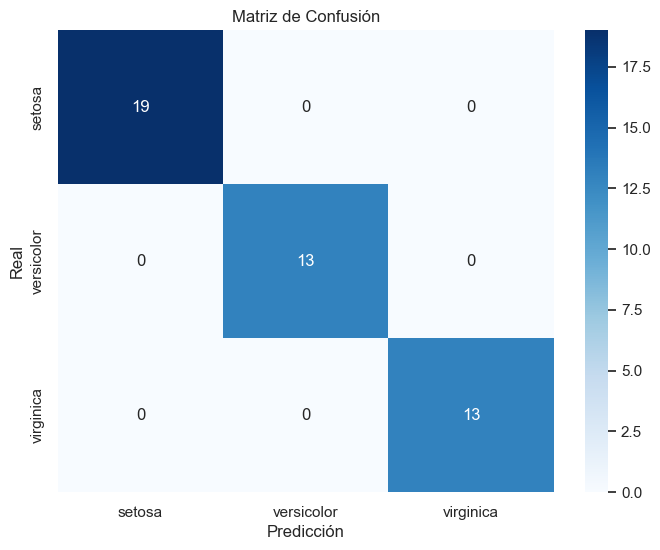

In [4]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

---

## 4. Reporte de Clasificación

El reporte incluye métricas clave para cada clase.

In [5]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

